## Transportation network datasets

In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:
from sclibrary import read_tntp

def read_transportation_dataset(dataset: str):
    data_folder = "data/transportation_networks"
    network_data_path = f"{data_folder}/{dataset}/{dataset}_net.tntp"

    sc = read_tntp(
        filename=network_data_path,
        src_col="init_node",
        dest_col="term_node",
        skip_rows=8,
        delimeter="\t"
    ).to_simplicial_complex()
        
    return sc


dataset = "anaheim"
sc = read_transportation_dataset(dataset=dataset)
sc.summary()

914


{'nodes': 416,
 'edges': 634,
 'triangles': 54,
 'shape': (416, 634, 54),
 'max_dim': 2,
 'is_connected': True,
 'edge_feature_names': []}

In [2]:
from sclibrary import read_tntp, get_coordinates, SCPlot

data_folder = "data/transportation_networks"
dataset = "Chicago-Sketch"
dataset_path = f"{data_folder}/{dataset}/ChicagoSketch_net.tntp"

filename=dataset_path
src_col="init_node"
dest_col="term_node"
skip_rows=8
delimeter="\t"

# read the network data
sc = read_tntp(
    filename=filename,
    src_col=src_col,
    dest_col=dest_col,
    skip_rows=skip_rows,
    delimeter=delimeter
).to_simplicial_complex()

print(sc.summary())

# read the node coordinates
filename = f"{data_folder}/{dataset}/ChicagoSketch_node.tntp"
coordinates = get_coordinates(
    filename=filename,
    node_id_col="node",
    x_col="X",
    y_col="Y",
    delimeter="\t",
)

{'nodes': 933, 'edges': 1475, 'triangles': 112, 'shape': (933, 1475, 112), 'max_dim': 2, 'is_connected': True, 'edge_feature_names': ['capacity', 'length', 'free_flow_time', 'b', 'power', 'speed', 'toll', 'link_type']}


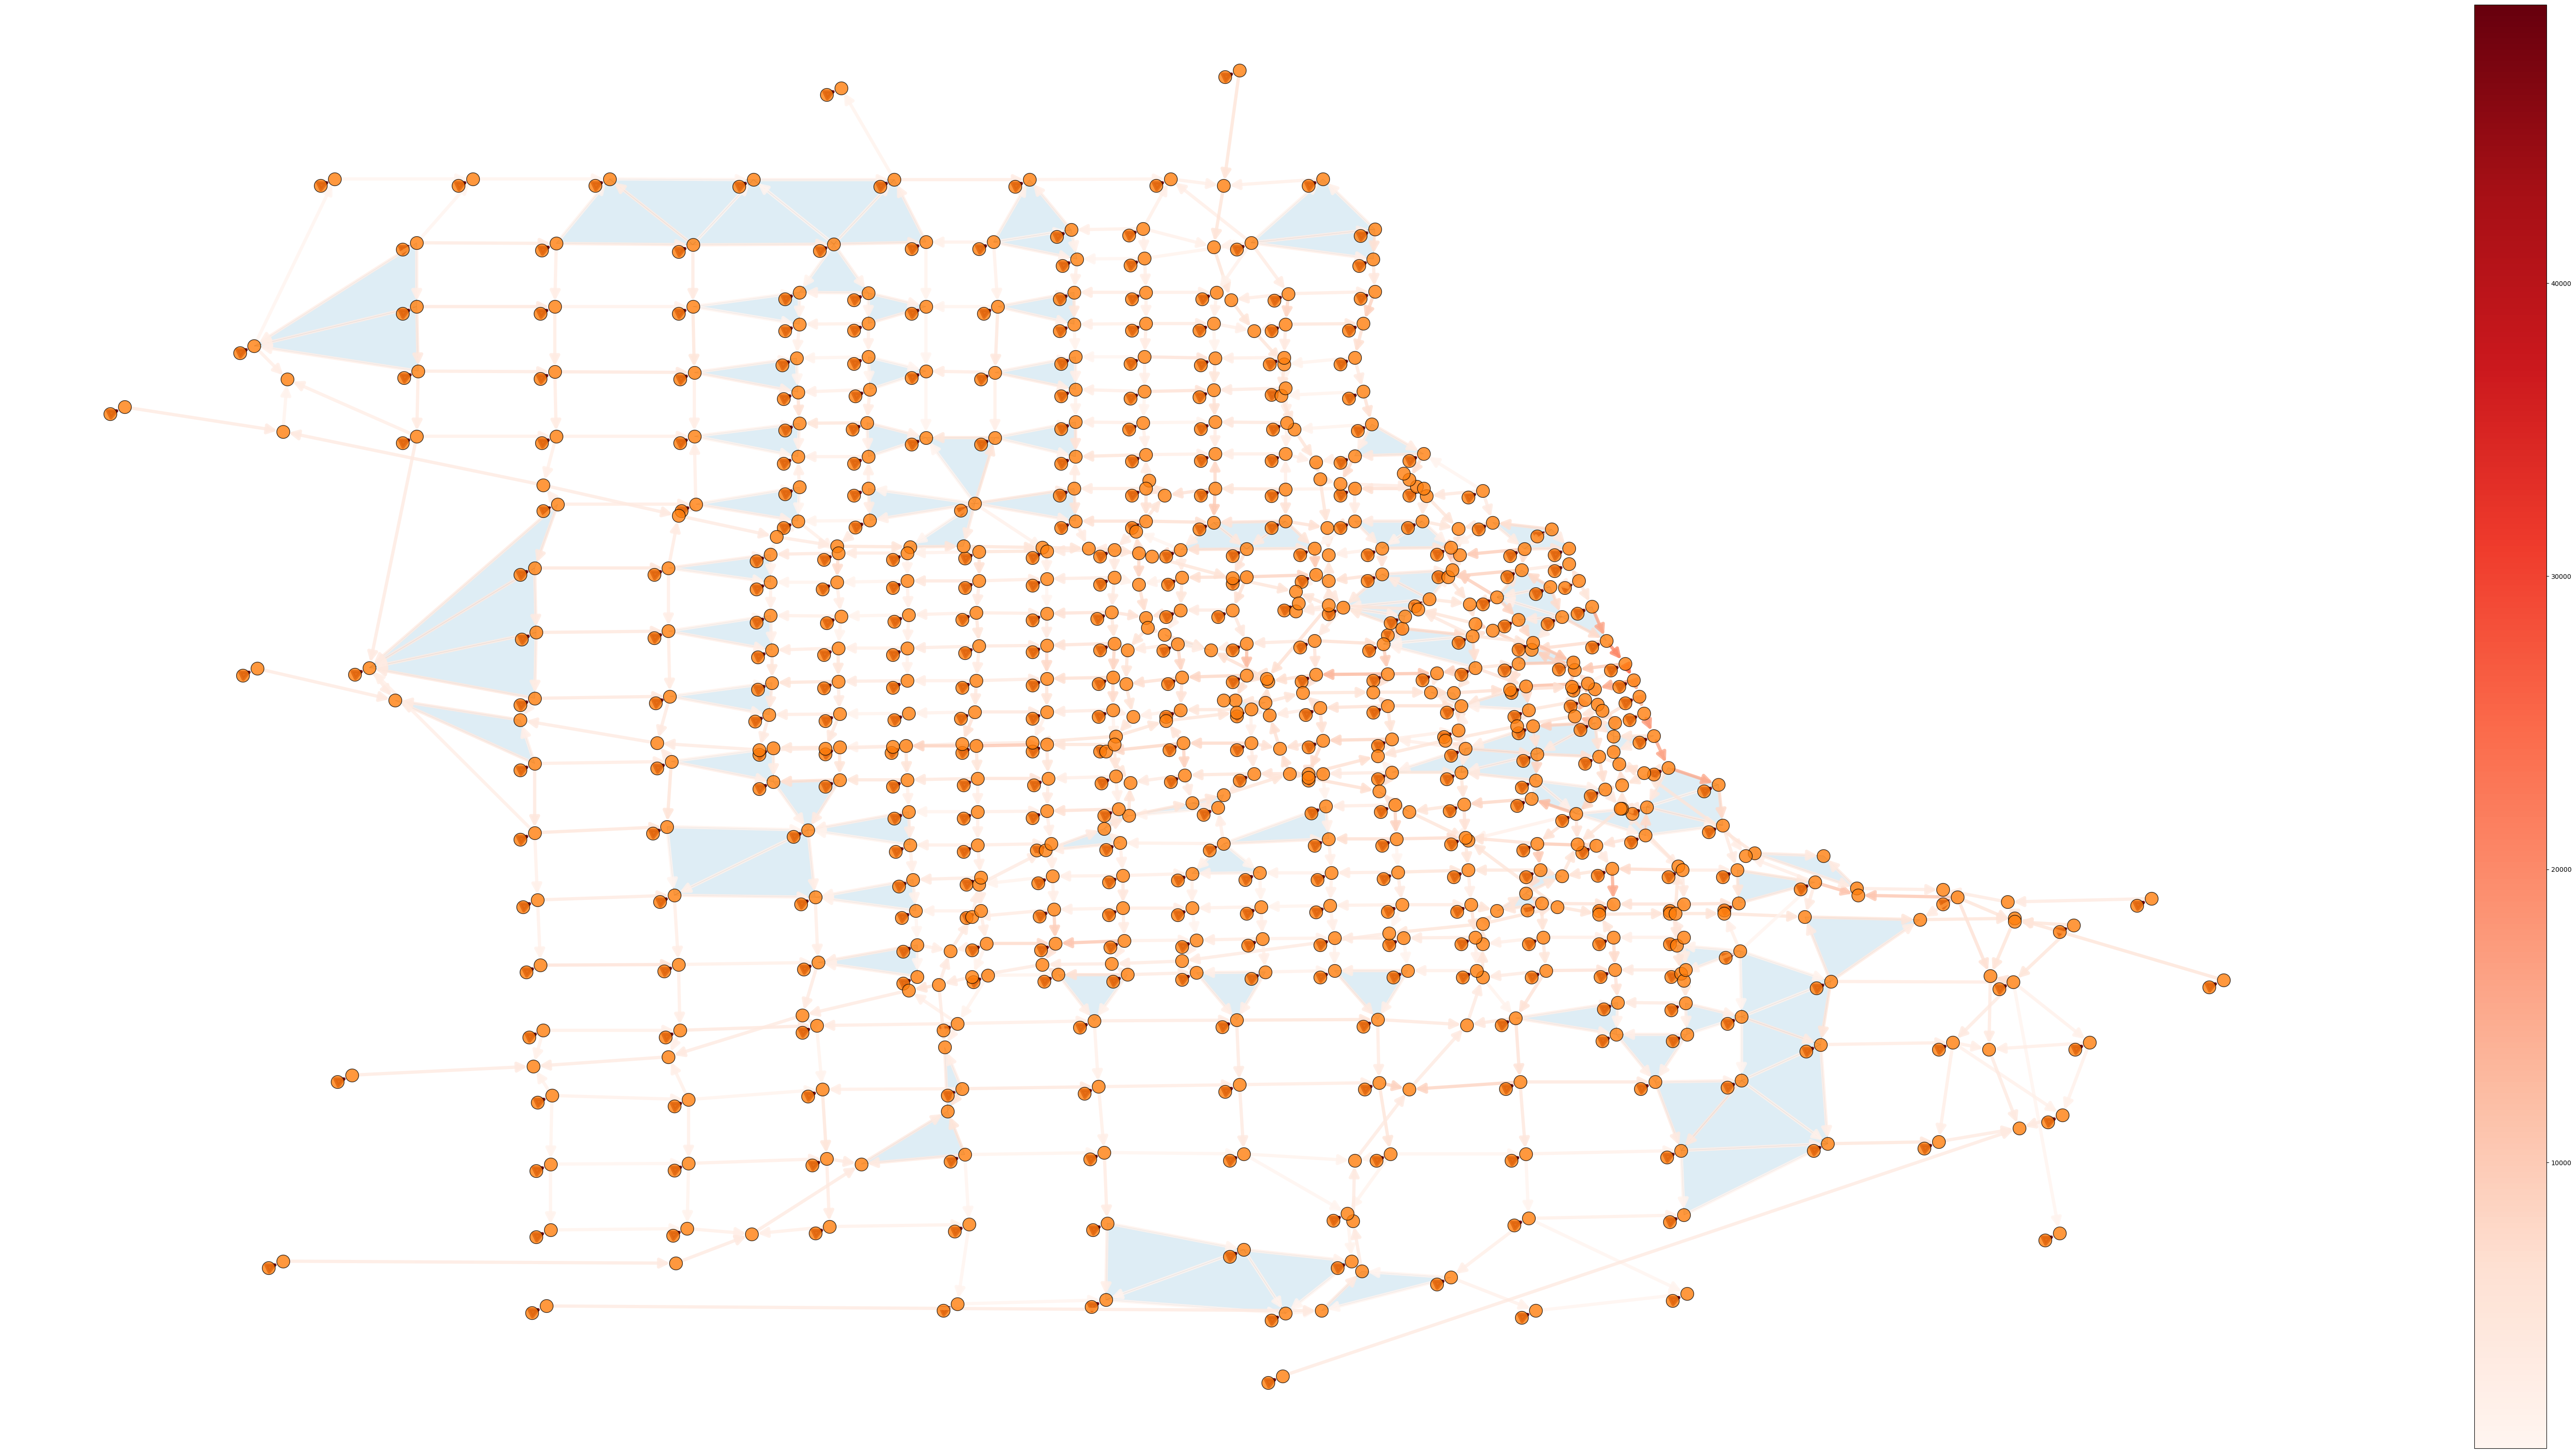

In [5]:
import matplotlib.pyplot as plt

scplot = SCPlot(sc, coordinates)
fig, ax = plt.subplots(1, 1, figsize=(80, 40))

capacity = sc.get_edge_features("capacity")

scplot.draw_network(edge_flow=capacity, ax=ax, with_labels=False)